# HW - 4 Assignment 3

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Jan, Feb for winter
winter1 = pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_MMajumdar/HW4/201501-citibike-tripdata.csv')
winter2 = pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_MMajumdar/HW4/201502-citibike-tripdata.csv')
#June, July for summer
summer1 = pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_MMajumdar/HW4/201506-citibike-tripdata.csv')
summer2 = pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_MMajumdar/HW4/201507-citibike-tripdata.csv')


In [3]:
df_w=pd.concat([winter1,winter2],keys=['x','y'])
df_s=pd.concat([summer1,summer2],keys=['x','y'])

In [4]:
df_s.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [5]:
df_w['age'] = 2015-df_w['birth year'][(df_w['usertype'] == 'Subscriber')]
df_s['age'] = 2015-df_s['birth year'][(df_s['usertype'] == 'Subscriber')]

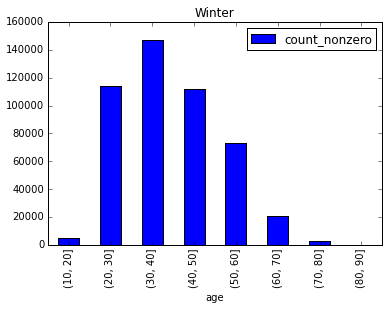

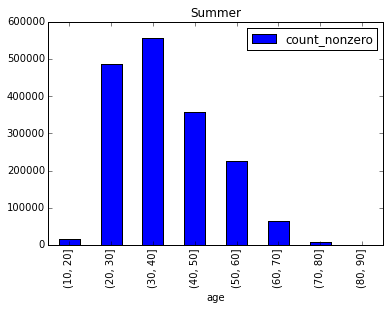

In [6]:
bins = np.arange(10, 99, 10)
df_w.age.groupby(pd.cut(df_w.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
w_age_dist = df_w.age.groupby(pd.cut(df_w.age,bins)).agg([count_nonzero])

df_s.age.groupby(pd.cut(df_s.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
s_age_dist = df_s.age.groupby(pd.cut(df_s.age,bins)).agg([count_nonzero])

## Comparing to normal and poisson

In [7]:
#compare to normal

ksW=scipy.stats.kstest(w_age_dist, 'norm')
ksS=scipy.stats.kstest(s_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(w_age_dist, 'cauchy')
ksS=scipy.stats.kstest(s_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, normal fit (0.99999783543649534, 0.0)
summer, normal fit (0.99999942773898987, 0.0)


### TODO FOR YOU!

-- repeat with the AD test, and/or any other tests you wish

-- do you see differences in the sample? significant differences?

-- do you dare (and this is indeed optional but could be fun) splitting the samples by up- and down-town?

In [8]:
ad_winterNormal = scipy.stats.anderson(w_age_dist['count_nonzero'],'norm')

print 'AD test for Winter on Normal fit',ad_winterNormal

print ""

ad_summerNormal = scipy.stats.anderson(s_age_dist['count_nonzero'],'norm')
print 'AD test for Summer on Normal fit',ad_summerNormal

AD test for Winter on Normal fit (0.52524719226309102, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

AD test for Summer on Normal fit (0.49889609420606718, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [9]:
ad_winterLogistic = scipy.stats.anderson(w_age_dist['count_nonzero'],'logistic')

print 'AD test for Winter on Logistic fit',ad_winterLogistic

print ""

ad_summerLogistic = scipy.stats.anderson(s_age_dist['count_nonzero'],'logistic')
print 'AD test for Summer on Logistic fit',ad_summerLogistic

AD test for Winter on Logistic fit (0.55996954876989058, array([ 0.413,  0.546,  0.64 ,  0.746,  0.879,  0.979]), array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

AD test for Summer on Logistic fit (0.52376780266605039, array([ 0.413,  0.546,  0.64 ,  0.746,  0.879,  0.979]), array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


#### There is difference in the samples

KS test for Normal model(winter) = 1.0,
KS test for Normal model(summer) = 1.0

Anderson Darling test for Normal model(winter) = 0.52524719226309102,
Anderson Darling test for Normal model(summer) = 0.49889609420606718

Anderson Darling test for Logistic model(winter) = 0.55996954876989058,
Anderson Darling test for Logistic model(summer) = 0.52376780266605039